<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/RandomForest_company(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("/content/Company_Data.csv")
df1 = df.copy()
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [29]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [30]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [31]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

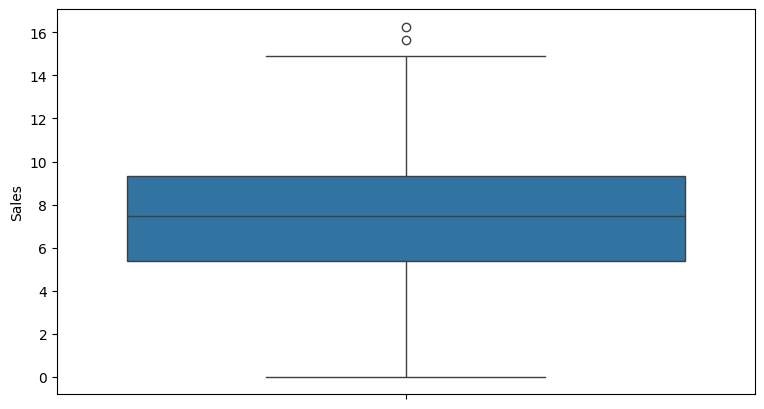

In [32]:
ax = sns.boxplot(df1['Sales'])

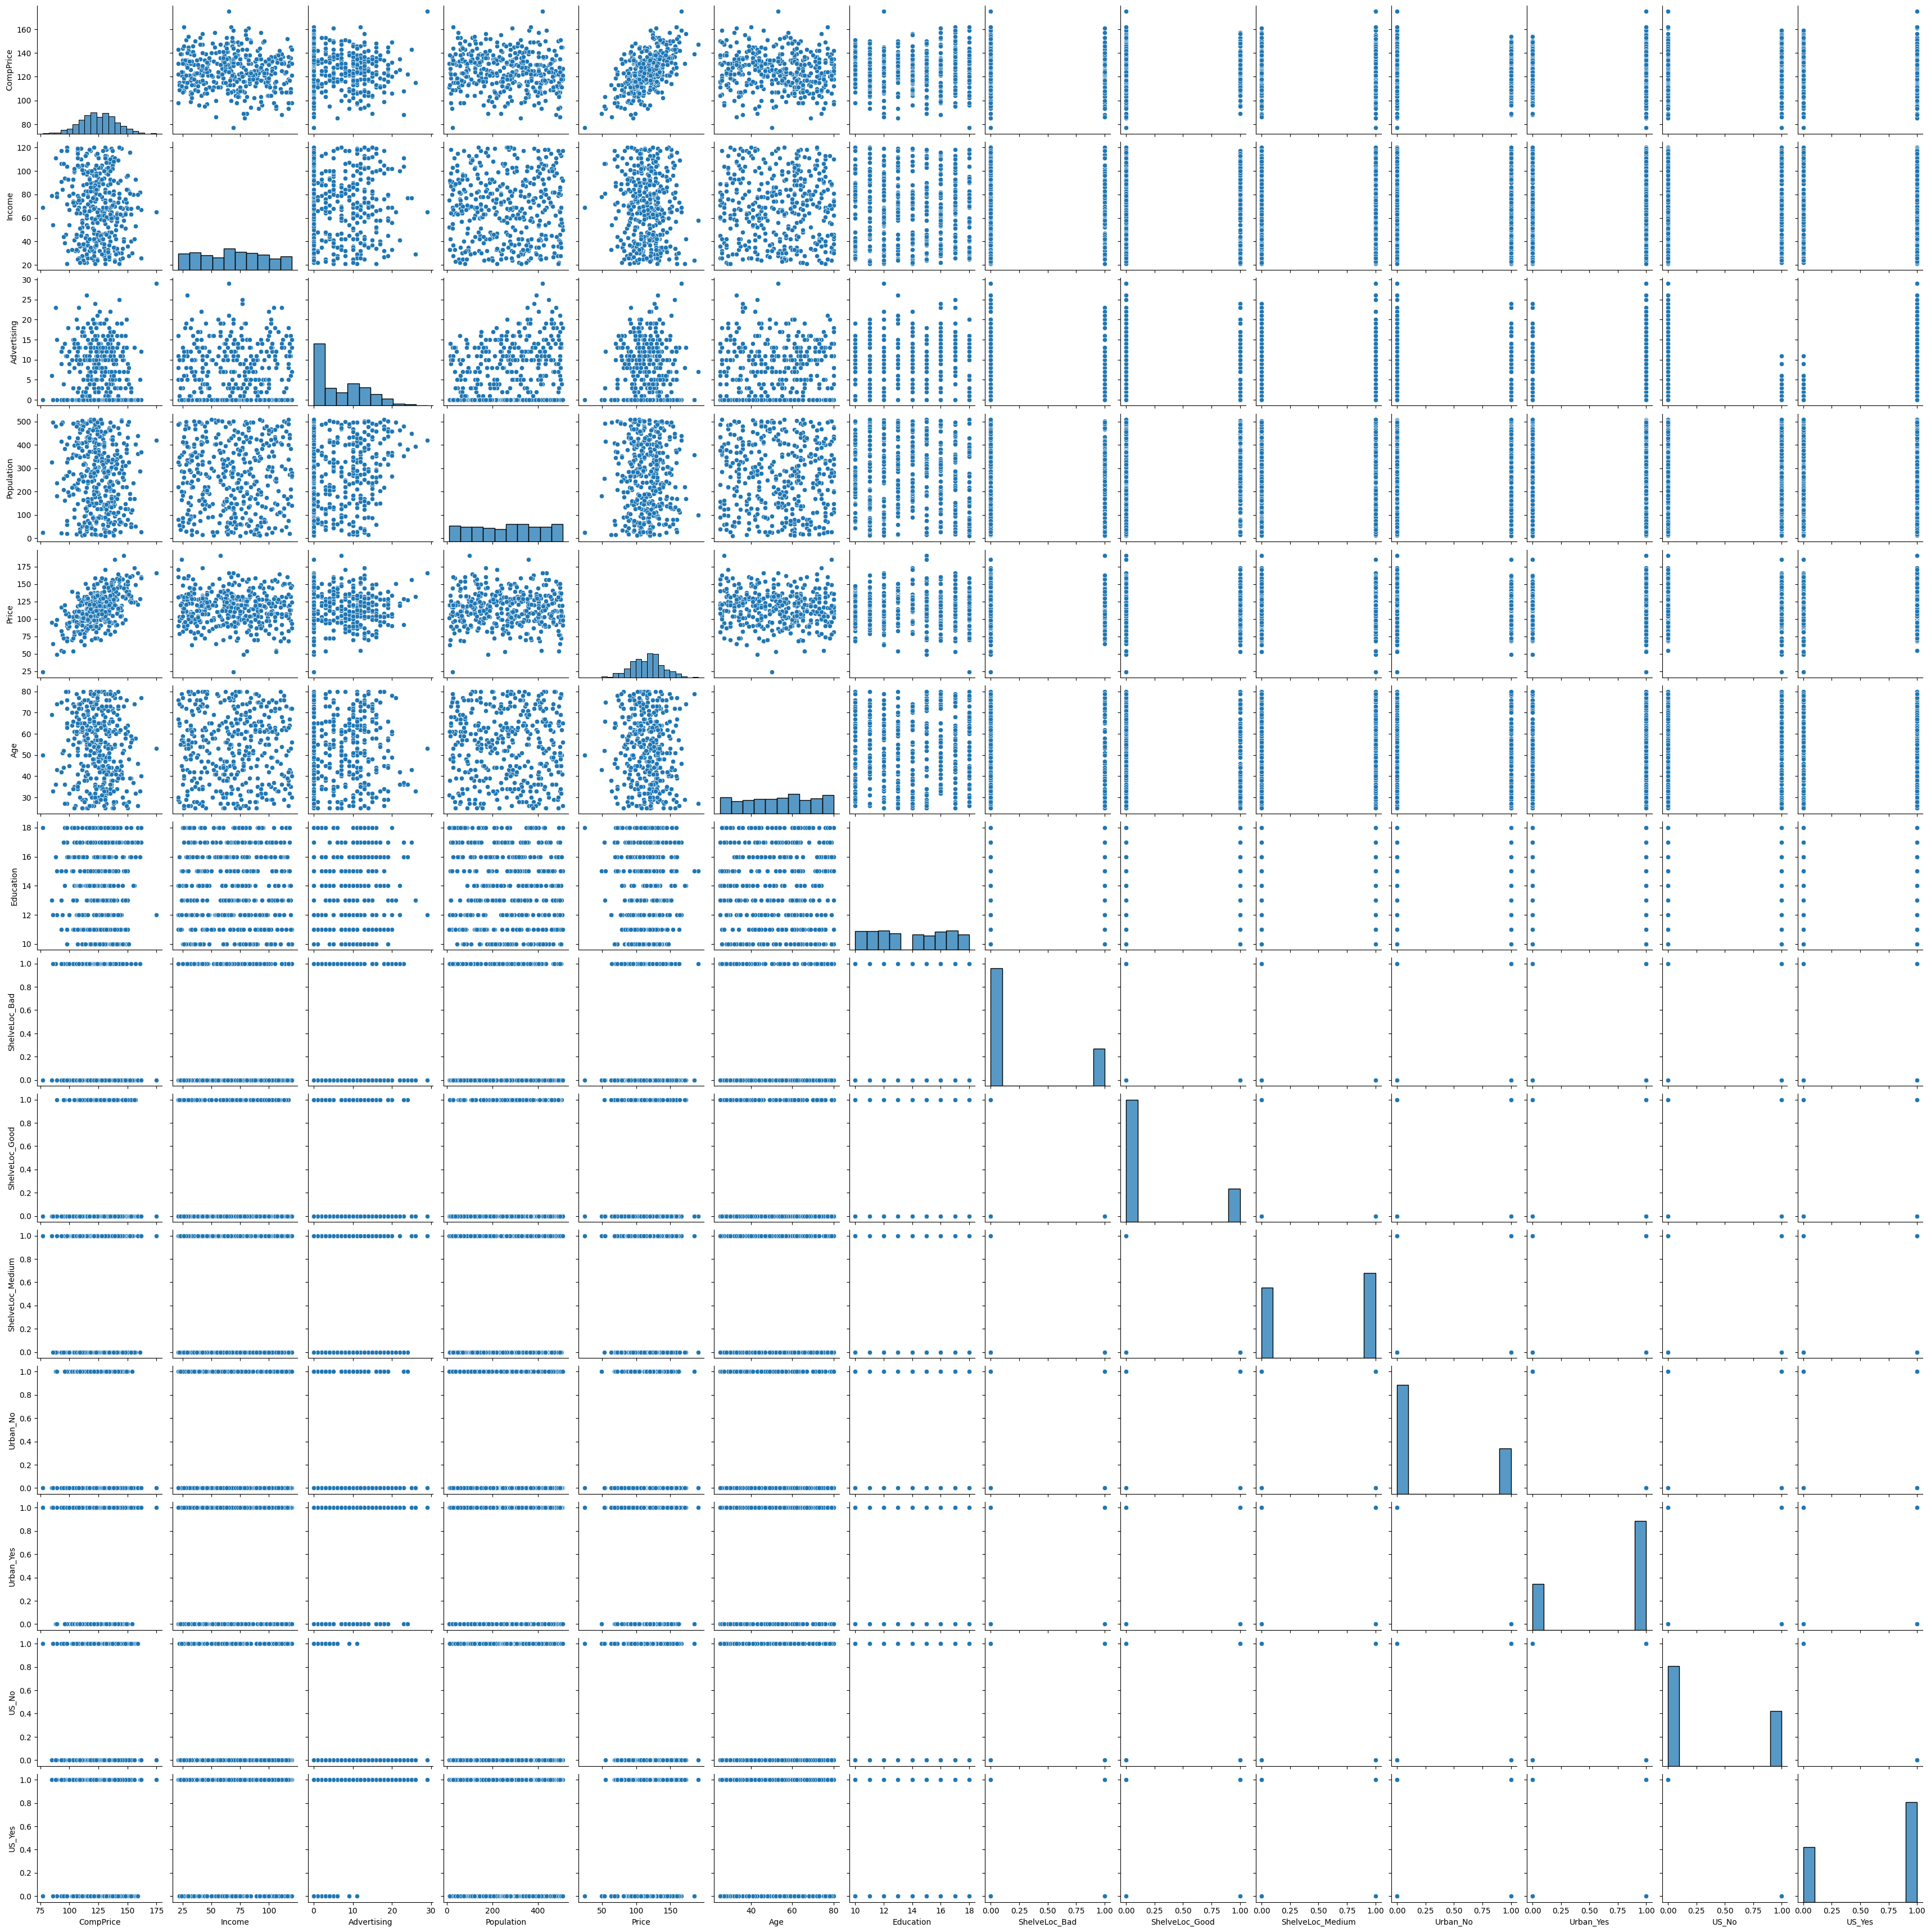

In [74]:
sns.pairplot(df1)

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


<ipython-input-33-347263709cb8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['Sales'],shade=True,color='g')


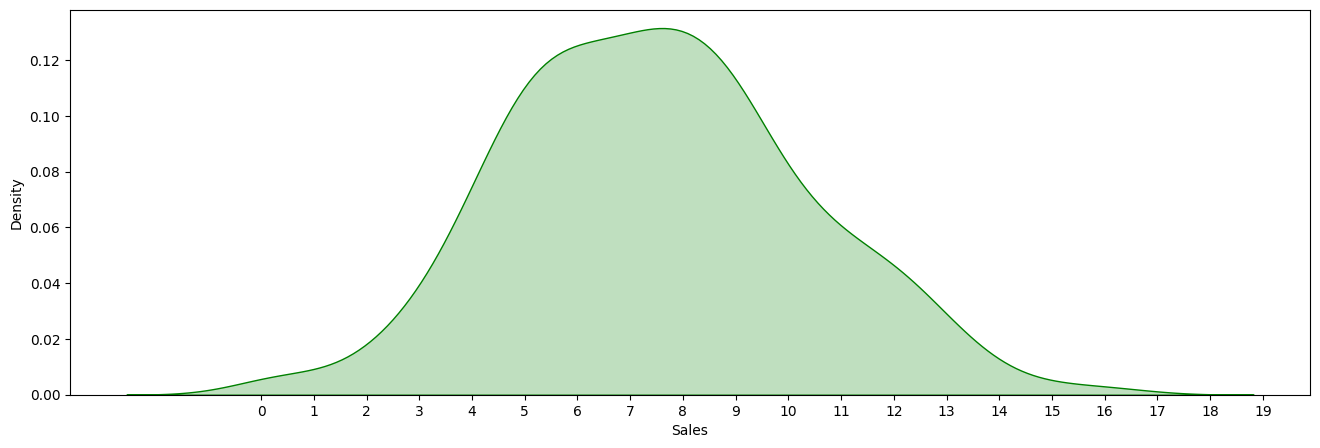

In [33]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

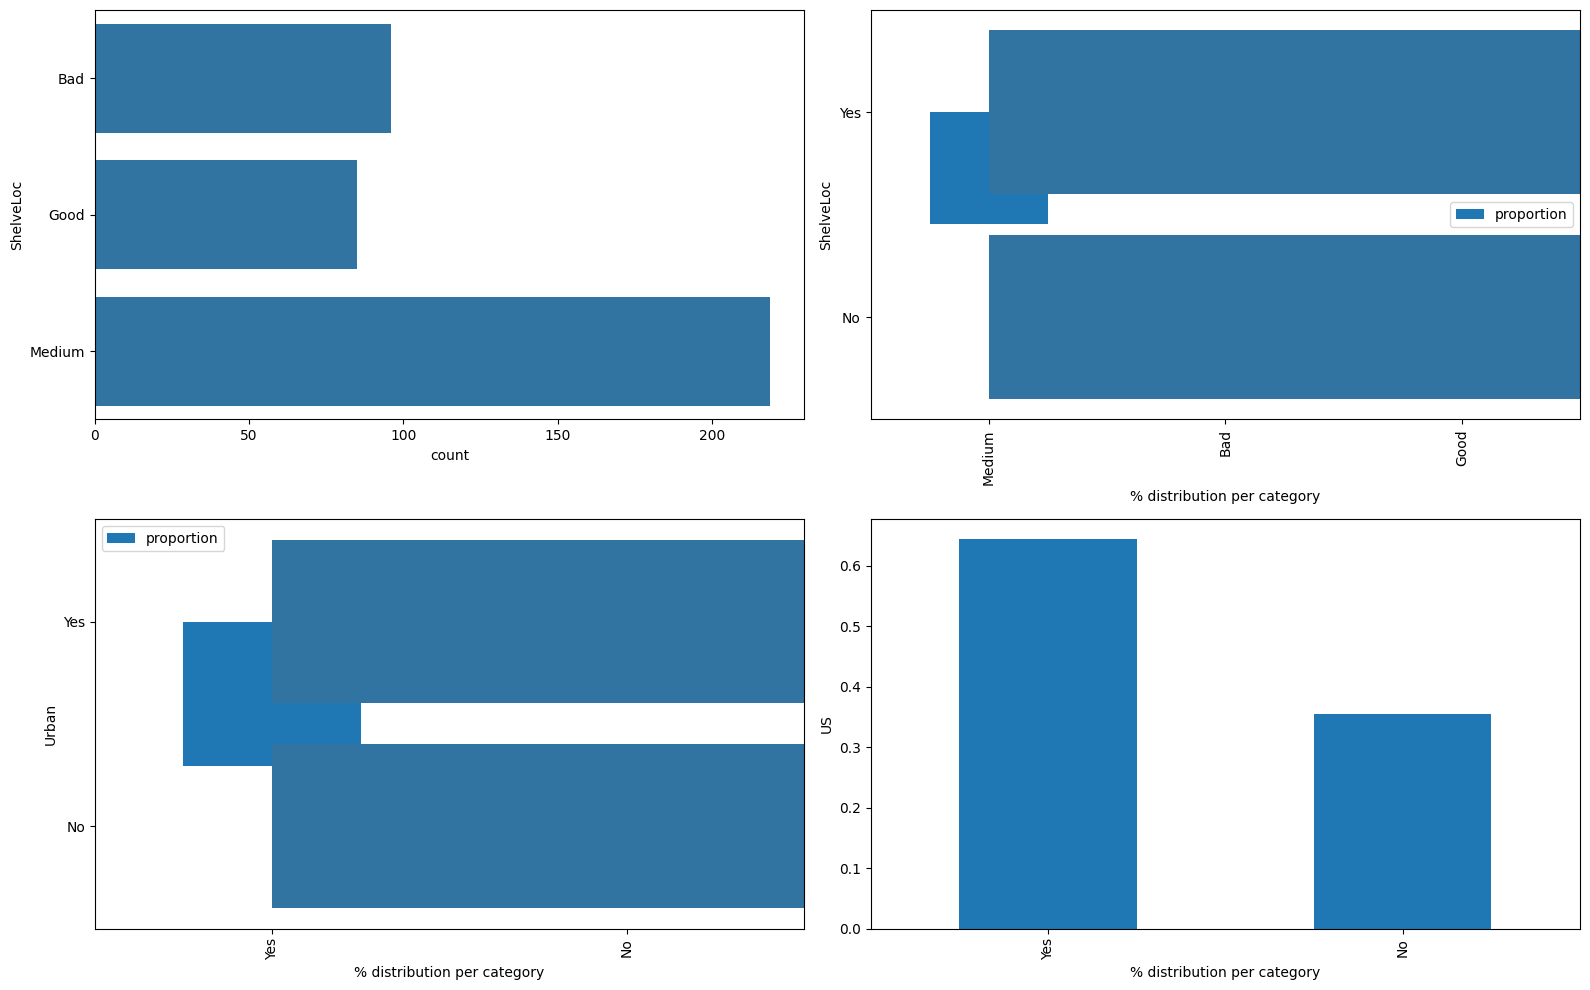

In [34]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<ipython-input-35-7ffd025295fa>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-35-7ffd025295fa>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-35-7ffd025295fa>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-35-7ffd025295fa>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-35-7ffd025295fa>:5: FutureWarning: 

`shade` 

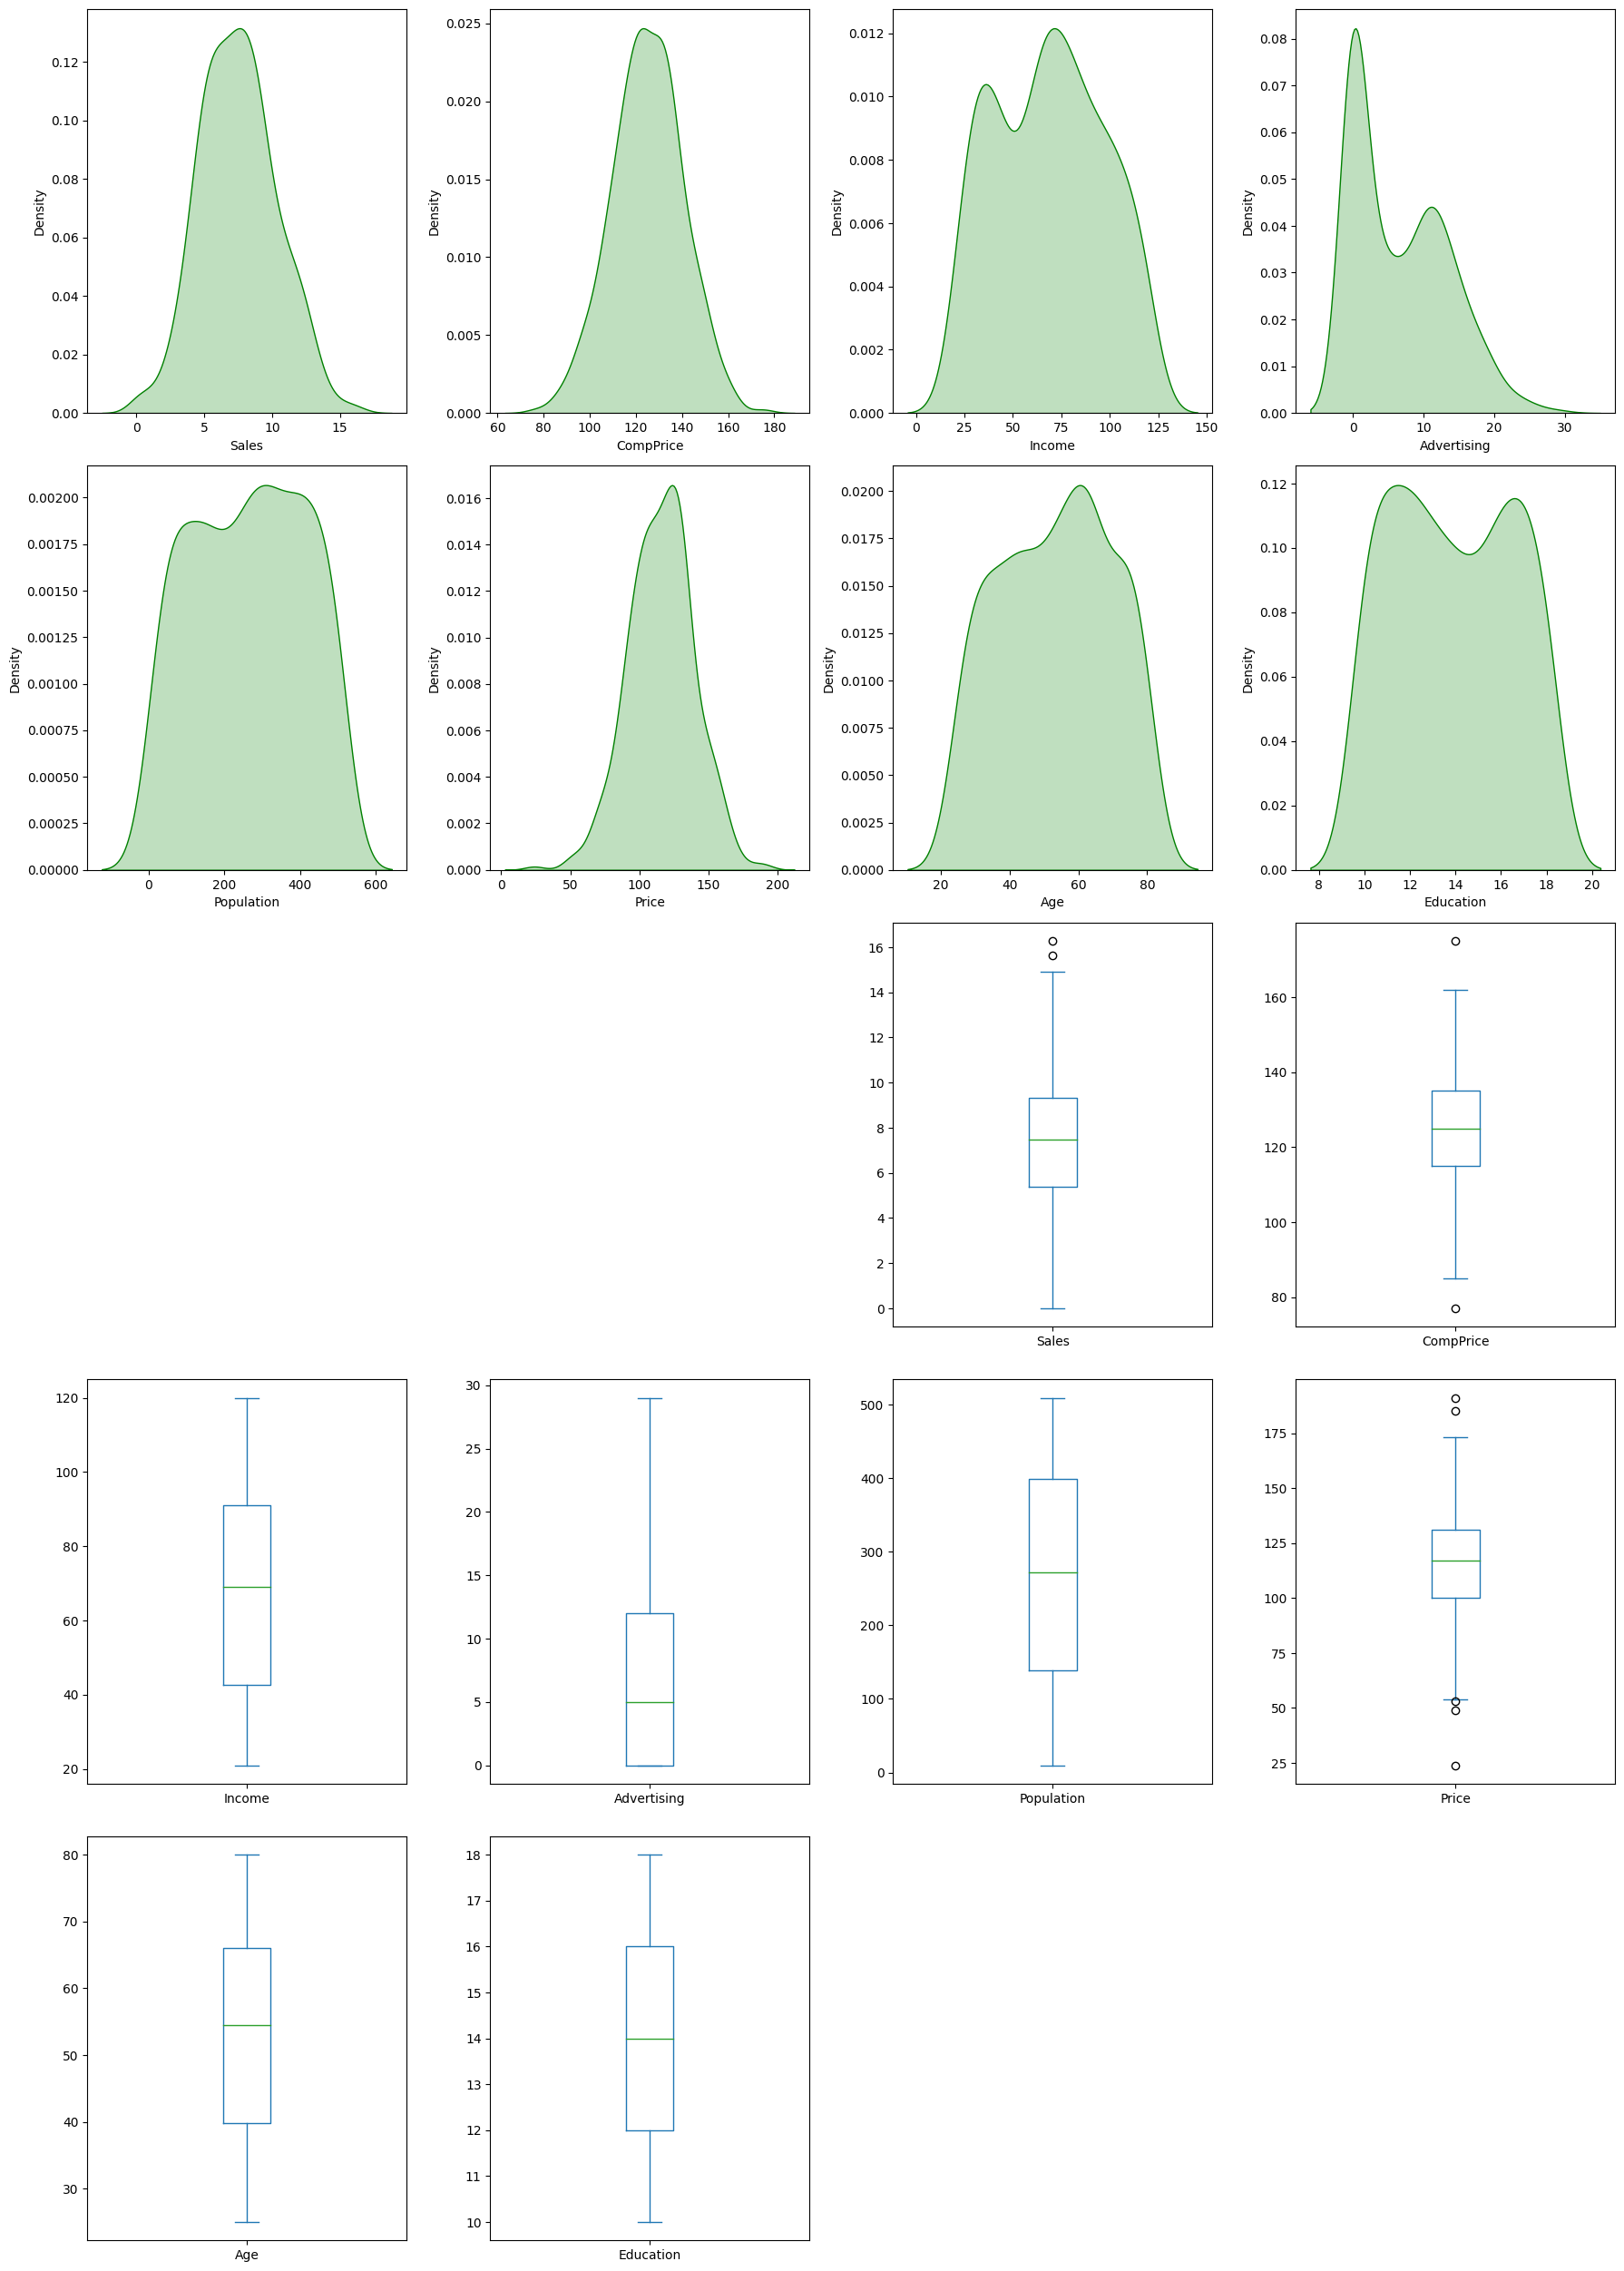

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [35]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

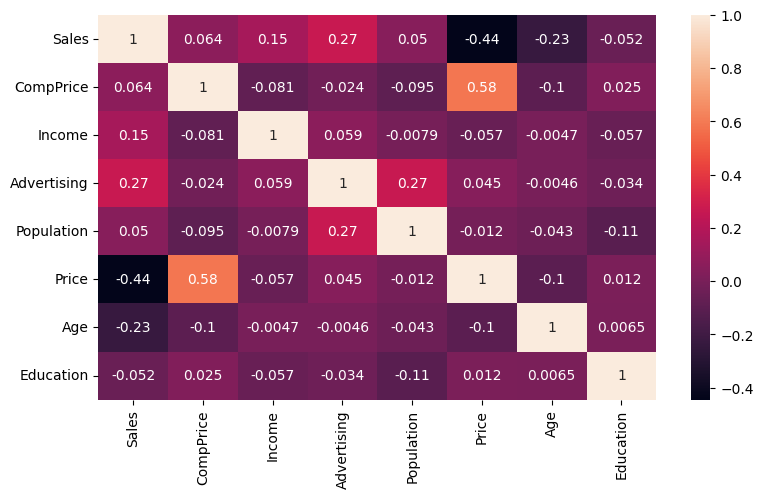

In [36]:
df2 = df1.select_dtypes(include=[np.number])
corr = df2.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [37]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [38]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [39]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [41]:
y_train.value_counts()

sales
large    163
small    157
Name: count, dtype: int64

In [42]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy')
model.fit(x_train,y_train)
model.oob_score_

0.78125

In [43]:
pred_train = model.predict(x_train)

In [44]:
accuracy_score(y_train,pred_train)

1.0

In [45]:
confusion_matrix(y_train,pred_train)

array([[163,   0],
       [  0, 157]])

In [46]:
pred_test = model.predict(x_test)

In [47]:
accuracy_score(y_test,pred_test)

0.85

In [48]:
confusion_matrix(y_test,pred_test)

array([[30,  6],
       [ 6, 38]])

In [49]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
52,large,small
194,small,large
150,large,large
42,large,large
132,large,large
...,...,...
259,small,small
191,small,large
261,small,small
361,large,large


In [50]:
cols = list(df1.columns)

In [51]:
predictors = cols[0:14]
target = cols[14]

In [52]:
tree1 = model.estimators_[20]

In [53]:
dot_data = StringIO()

In [54]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [55]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [56]:
graph.write_png('company_full.png')

True

In [57]:
rf_small = RF(n_estimators=10, max_depth = 3)
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [58]:
tree_small = rf_small.estimators_[5]

In [59]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [61]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [62]:
graph.write_png('company_small.png')

True

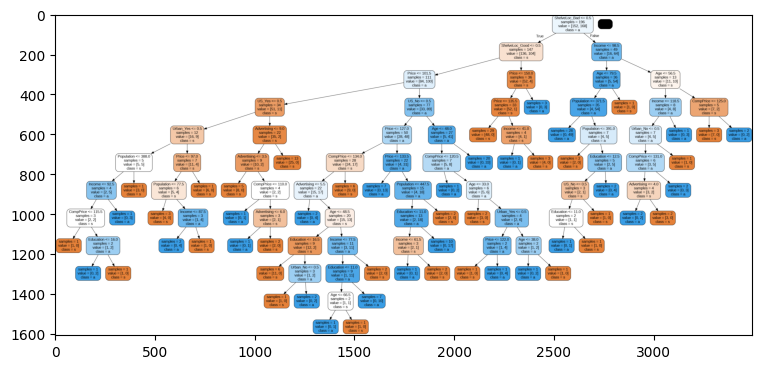

In [69]:
img = mpimg.imread('/content/company_full.png')
plt.imshow(img)

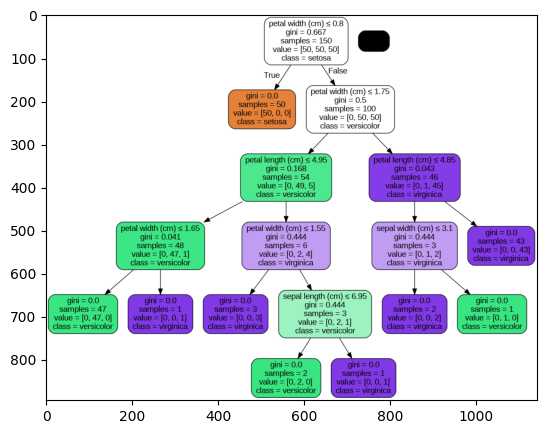

In [70]:
img2 = mpimg.imread('/content/company_small.png')
plt.imshow(img2)

In [71]:
model.feature_importances_

array([0.10501663, 0.09723071, 0.10104325, 0.09301978, 0.24777765,
       0.11736036, 0.05904392, 0.04724897, 0.06372067, 0.02641133,
       0.00940489, 0.01152489, 0.01051961, 0.01067734])

In [72]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [73]:
fi

,feature,importance
4,Price,0.247778
5,Age,0.117360
0,CompPrice,0.105017
2,Advertising,0.101043
1,Income,0.097231
3,Population,0.093020
8,ShelveLoc_Good,0.063721
6,Education,0.059044
7,ShelveLoc_Bad,0.047249
9,ShelveLoc_Medium,0.026411
